Market Basket Analysis is a valuable tool for businesses seeking to optimize their product offerings, increase cross-selling opportunities, and improve marketing strategies. It can lead to higher revenue, enhanced customer satisfaction, and overall business success.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\market_basket_dataset.csv")

In [3]:
df.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [4]:
df.shape

(500, 5)

In [28]:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

In [6]:
df.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


Now, let’s have a look at the sales distribution of items:

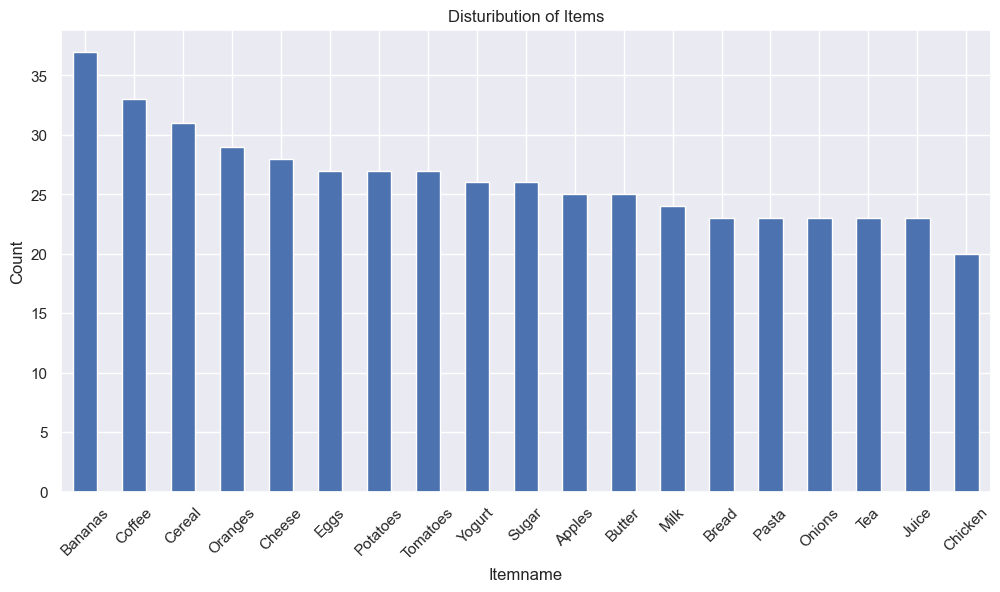

In [29]:
plt.figure(figsize=(12,6));
df.Itemname.value_counts().plot(kind='bar');
plt.xticks(rotation=45);
plt.ylabel('Count');
plt.title('Disturibution of Items');

Now, let’s have a look at the top 10 most popular items sold by the store:

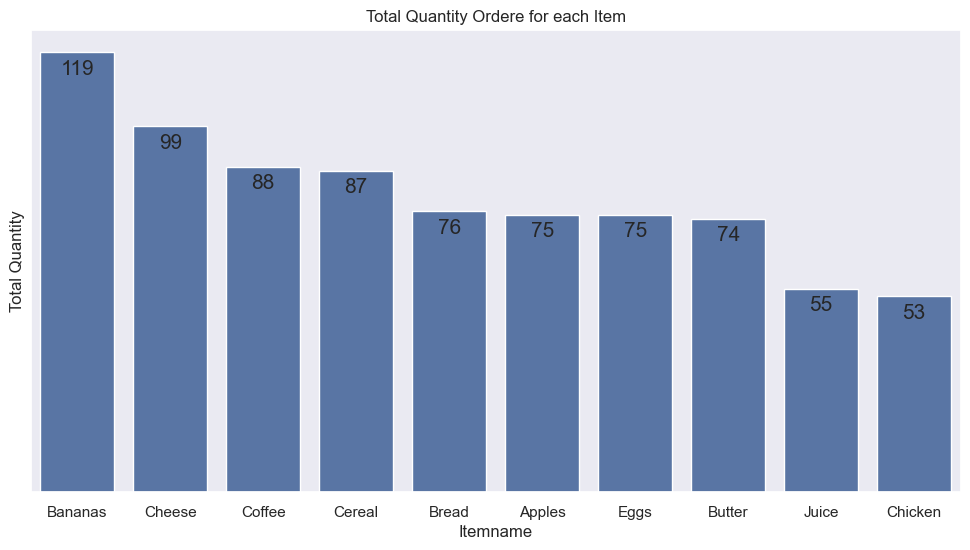

In [65]:
plt.figure(figsize=(12, 6));
items = df.groupby('Itemname')['Quantity'].sum().head(10).sort_values(ascending=False)
sns.barplot(items);
plt.xticks(rotation=0);
plt.ylabel('Total Quantity');
plt.yticks([])
plt.title('Total Quantity Ordere for each Item');
for item, value in zip(items.index, items):
    plt.text(item, value-6, value, ha='center', size=15);

So, bananas are the most popular items sold at the store. Now, let’s have a look at the customer behaviour:

In [81]:
customer_behaviour = df.groupby('CustomerID').agg({'Quantity': 'mean', 'Price': 'sum'}).reset_index()
customer_behaviour.head(10)

,CustomerID,Quantity,Price
0,10504,1.0,2.04
1,10588,5.0,5.50
2,10826,1.0,5.67
3,11113,3.0,8.84
4,11267,1.0,8.87
5,11373,2.0,6.69
6,11430,3.0,4.85
7,11644,5.0,4.67
8,11752,4.0,6.06
9,11754,3.0,1.18


Here, we are exploring customer behaviour, comparing average quantity and total spending, and analyzing exact numerical values in the table for each customer.

### Association Rules

Now, let’s use the Apriori algorithm to create association rules. The Apriori algorithm is used to discover frequent item sets in large transactional datasets. It aims to identify items that are frequently purchased together in transactional data. It helps uncover patterns in customer behaviour, allowing businesses to make informed decisions about product placement, promotions, and marketing. Here’s how to implement Apriori to generate association rules:

In [94]:
#Ittems that are frequently purchaced together
basket = df.groupby('BillNo')['Itemname'].apply(list).reset_index()
basket

,BillNo,Itemname
0,1000,"[Apples, Butter, Eggs, Potatoes]"
1,1004,[Oranges]
2,1005,"[Milk, Onions, Cereal]"
3,1008,"[Tomatoes, Potatoes, Cereal]"
4,1011,[Bananas]
...,...,...
148,1471,"[Butter, Bread, Cereal, Cheese, Bananas, Yogur..."
149,1483,"[Tomatoes, Coffee]"
150,1485,"[Bread, Juice, Bananas, Chicken, Butter, Orang..."
151,1493,"[Chicken, Bananas, Juice, Bread]"


In [100]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
encoded = te.fit(basket.Itemname).transform(basket.Itemname)
encoded = pd.DataFrame(encoded, columns = te.columns_)
encoded

,Apples,Bananas,Bread,Butter,Cereal,Cheese,Chicken,Coffee,Eggs,Juice,Milk,Onions,Oranges,Pasta,Potatoes,Sugar,Tea,Tomatoes,Yogurt
0,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,False,True,True,True,True,True,True,True,True,True,False,False,True,True,False,False,False,False,True
149,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
150,False,True,True,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,False
151,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False


Making the Apriori items

In [119]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(encoded, min_support=0.05, use_colnames=True)
frequent_items

,support,itemsets
0,0.163399,(Apples)
1,0.241830,(Bananas)
2,0.150327,(Bread)
3,0.163399,(Butter)
4,0.202614,(Cereal)
5,0.183007,(Cheese)
6,0.130719,(Chicken)
7,0.215686,(Coffee)
8,0.176471,(Eggs)
9,0.150327,(Juice)


##### Making the Association Rules

In [122]:

rules = association_rules(frequent_items, metric = 'lift', min_threshold = 0.5)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,(Apples),(Sugar),0.058824,0.360000,2.118462
1,(Sugar),(Apples),0.058824,0.346154,2.118462
2,(Apples),(Yogurt),0.052288,0.320000,1.883077
3,(Yogurt),(Apples),0.052288,0.307692,1.883077
4,(Bananas),(Butter),0.058824,0.243243,1.488649
5,(Butter),(Bananas),0.058824,0.360000,1.488649
6,(Bananas),(Cereal),0.058824,0.243243,1.200523
7,(Cereal),(Bananas),0.058824,0.290323,1.200523
8,(Bananas),(Cheese),0.052288,0.216216,1.181467
9,(Cheese),(Bananas),0.052288,0.285714,1.181467


The above output shows association rules between different items (antecedents) and the items that tend to be purchased together with them (consequents). Let’s interpret the output step by step:

-Antecedents: These are the items that are considered as the starting point or “if” part of the association rule. For example, Apples, Butter, Bananas, Cheese, and Chicken are the antecedents in this analysis.

-Consequents: These are the items that tend to be purchased along with the antecedents or the “then” part of the association rule.

-Support: Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset. It is essentially the proportion of transactions in which the items are bought together. For example, the first rule indicates that Sugar and Apples are bought together in approximately 5.88% of all transactions.

-Confidence: Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket. In other words, it shows the probability of buying the consequent item when the antecedent item is bought. For example, the first rule tells us that there is a 36% chance of buying Sugar when Apples is already in the basket.

-Lift: Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item. A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently. A value less than 1 indicates a negative association. For example, the first rule has a lift of approximately 2.11, suggesting a positive association between Sugar and Apples.